**DEPENDENCIES HERE**

In [ ]:
'''
dependencies installation
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
#feature selec
from sklearn.ensemble import RandomForestClassifier
#for dataset loading
import kagglehub
from kagglehub import KaggleDatasetAdapter
#splitting
from sklearn.model_selection import train_test_split
#cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 **EDA HERE**

In [ ]:
file_path = "test.csv"

# Load the latest version
test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "itoksk/titanic",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

tbadd=kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "itoksk/titanic",
  "gender_submission.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
test['Survived'] = tbadd['Survived']
print(test.shape)
print(test.columns)

(418, 12)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Assuming the data file is named 'Titanic.csv' within the dataset


file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "itoksk/titanic",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
'''
starting EDA
'''
df = df.rename(columns={'SibSp': 'Sibling_spouse_onboard', 'Parch': 'parent_child_onboard'})
test=test.rename(columns={'SibSp': 'Sibling_spouse_onboard', 'Parch': 'parent_child_onboard'})
print(test.shape)
print(df.shape)
print(df.info())
print(df.describe(include='all'))

(418, 12)
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Name                    891 non-null    object 
 4   Sex                     891 non-null    object 
 5   Age                     714 non-null    float64
 6   Sibling_spouse_onboard  891 non-null    int64  
 7   parent_child_onboard    891 non-null    int64  
 8   Ticket                  891 non-null    object 
 9   Fare                    891 non-null    float64
 10  Cabin                   204 non-null    object 
 11  Embarked                889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name 

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                       177
Sibling_spouse_onboard      0
parent_child_onboard        0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Sibling_spouse_onboard', 'parent_child_onboard', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


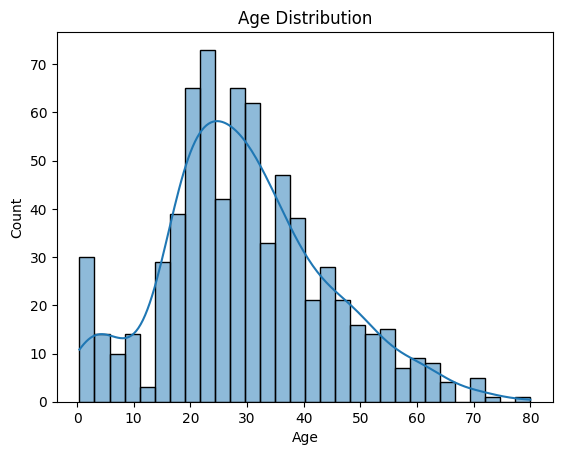

Survived                  0
Pclass                    0
Sex                       0
Age                       0
Sibling_spouse_onboard    0
parent_child_onboard      0
Fare                      0
Embarked                  0
dtype: int64
   Survived  Pclass     Sex   Age  Sibling_spouse_onboard  \
0         0       3    male  22.0                       1   
1         1       1  female  38.0                       1   

   parent_child_onboard     Fare Embarked  
0                     0   7.2500        S  
1                     0  71.2833        C  


In [ ]:
'''
dropping columns and checking for NAN and null values or missing values
'''
print(df.isnull().sum())

'''
we fill the age and other missing sections
'''
print(df.columns)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()
#right tail longer frm graph so it is positively skewed
# so since it is skewed we can fill data based on the median so ...
df['Age'] = df['Age'].fillna(df['Age'].median())

#>77% of cabin data is missing so drop cabin
df=df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=False)

#embarked has 2 missing data so fill by mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)
print(df.isnull().sum())
print(df.head(2))

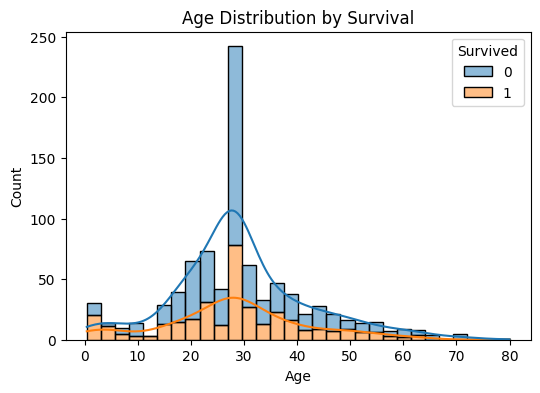

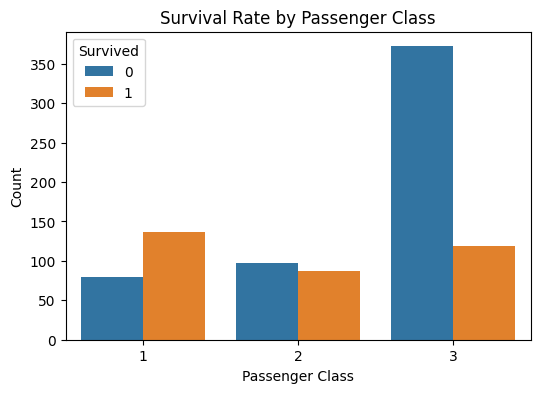

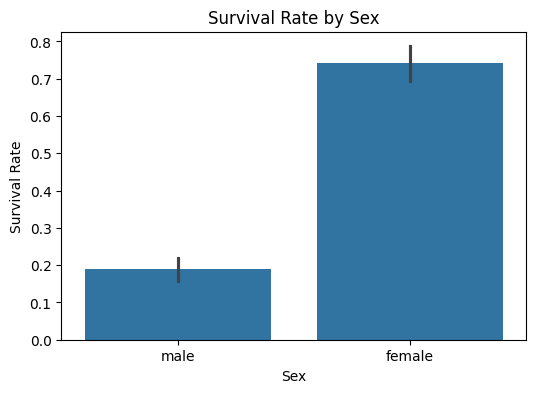

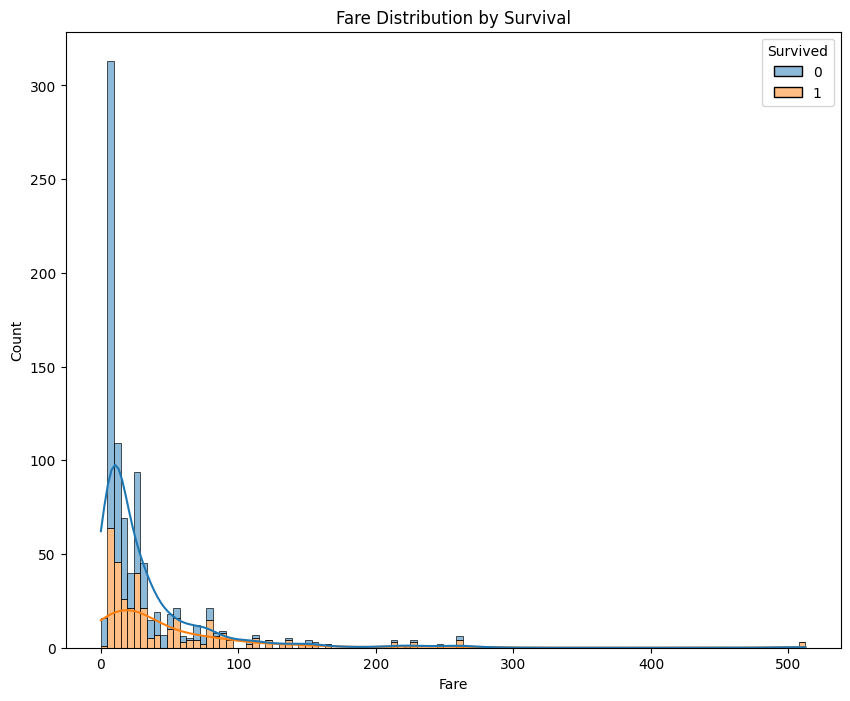

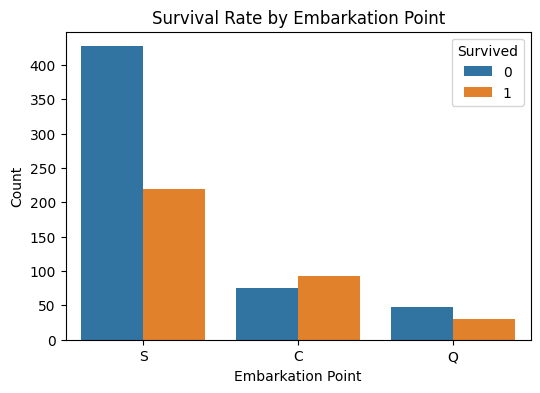

In [ ]:
'''
visualising data

observation frm visualisation

Age :
more deaths among 20-40 age , 0-10 survival rate more ,
Pclass :
Pclass 3 had more people dying , 1 had more surviving
Sex :
Females had more survival rates
Fare :
less fair less survival
Embarked :
S --more deaths , C --more surviving
'''
# Age vs Survived
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Pclass vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Sex vs Survived
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

# Fare vs Survived
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Embarked vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Sibling_spouse_onboard',
       'parent_child_onboard', 'Fare', 'Embarked'],
      dtype='object')

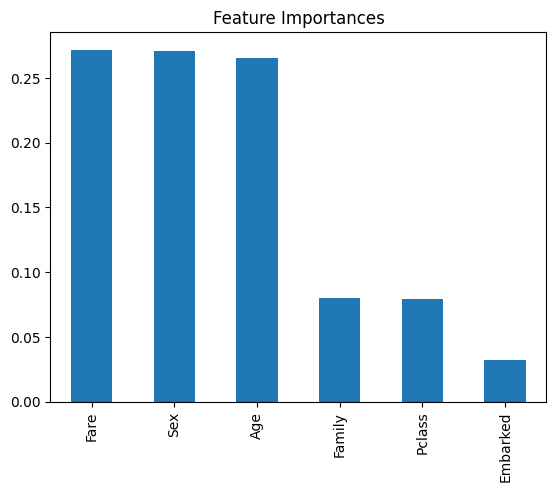

(418, 5)
(891, 5)
(891,)
(418,)


In [ ]:
'''
now we will perform feature selection
as per the graph we select Fare,Sex,Age,Pclass,Family
'''
#encoding literals
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#modifying some features
test['Family'] = test['Sibling_spouse_onboard'] + test['parent_child_onboard']
df['Family'] = df['Sibling_spouse_onboard'] + df['parent_child_onboard']

df.drop(['Sibling_spouse_onboard', 'parent_child_onboard'], axis=1, inplace=True)
test.drop(['Sibling_spouse_onboard', 'parent_child_onboard'], axis=1, inplace=True)
#selecting features using random forest

x=df.drop('Survived',axis=1,inplace=False)
y=df['Survived']
# Create a random forest
model = RandomForestClassifier()
model.fit(x, y)

importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()


# TO SELECT FEATURES HERE
X_train=df[['Fare','Sex','Age','Pclass','Family']].to_numpy()
X_test=test[['Fare','Sex','Age','Pclass','Family']].to_numpy()
Y_train=df['Survived'].to_numpy()
Y_test=test['Survived'].to_numpy()
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

**NEURAL NETWORK CODING STARTS (ALL PARTS CODED MANUALLY NO FRAMEWORK USED)**

In [ ]:
def initialise_params(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    also using xavier initialisation here in weight
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = ...
        # parameters['b' + str(l)] = ...
        # YOUR CODE STARTS HERE
        parameters['W'+str(l)]=np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/(layer_dims[l-1]))
        parameters['b'+str(l)]=np.zeros((layer_dims[l],1))
        # YOUR CODE ENDS HERE

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [ ]:
'''
We will be designing the neural net with relu and linear activation funcs for the hidden layers and sigmoid for the output layer
(we use relu here over leaky relu as there is no case of dying relu here ...dying relu is the phenomena where the input is subsequently <0 resulting in 0 output hence model temporarily stops learning for those values ...leaky relu we use in ding relu cases)
here in this code block we will define the functions to calculate the linear, relu and sigmoid activations for forward propagations
'''

m=Y_train.shape[0]
print(m)

def linear_f(A, W, b):
    """
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
  """

    Z=np.dot(W,A)+b
    #here A is of the previous layer
    cache = (A, W, b)
    return Z, cache

def relu_f(A_prev, W, b,):
    """
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer
    """
    Z,linear_cache=linear_f(A_prev, W, b)
    A=np.maximum(0,Z)

    cache = (linear_cache,Z)
    return A,cache

def sigmoid_f(A_prev,W,b):
  '''
  Arguments :
  A -- activations from previous layer (or input data): (size of previous layer, number of examples)
  W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
  b -- bias vector, numpy array of shape (size of the current layer
  '''
  Z,sigmoid_cache=linear_f(A_prev,W,b)
  A=  (1/(1+np.exp(-Z)))
  cache =(sigmoid_cache,Z)
  return A,cache

def forward(X,parameters):
  '''
  computing the forward propagation for linear-relu and linear-sigmoid layers
  '''
  caches = []
  # since A0 is X and later in the model we use W.A_prev+b in place of W.X+b so generalising
  A_prev = X
  L = len(parameters)//2

  for i in range(1,L):
    #1 to L-1 layers are relu
    A,cache=relu_f(A_prev,parameters['W'+str(i)],parameters['b'+str(i)])
    caches.append(cache)
    A_prev=A

  #last layer is sigmoid
  AL,cache=sigmoid_f(A,parameters['W'+str(L)],parameters['b'+str(L)])
  caches.append(cache)
  return AL,caches

def cost_function(AL,Y,lambd,parameters):
  '''
  computing the cost function J ...cost = summation(L) from 1 to m
  where L= -y(log a)-(1-y)(1-log(1-a))
  '''
  m = Y.shape[1]
  epsilon=1e-8
  L=len(parameters)//2
  cost= (-1/m)* np.sum(np.multiply(Y,np.log(AL+epsilon))+np.multiply(1-Y,np.log(1-AL+epsilon)))
  L2_regularization_cost = 0
  for l in range(1, L + 1):
      L2_regularization_cost += np.sum(np.square(parameters["W" + str(l)]))
  cost = cost + (lambd / (2 * m)) * L2_regularization_cost
  if((lambd / (2 * m)) * L2_regularization_cost<0):
    print("L2",(lambd / (2 * m)) * L2_regularization_cost)
  cost=np.squeeze(cost)
  return cost

891


In [ ]:
def linear_b(dZ,cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW=np.dot(dZ,A_prev.T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev=np.dot(W.T,dZ)
    return dA_prev,dW,db


def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we stored the linear output before applying the Sigmoid activation

    Returns:
    dZ -- Gradient of the cost with respect to the input of the Sigmoid function (Z)
    """
    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we stored the linear output before applying the ReLU activation

    Returns:
    dZ -- Gradient of the cost with respect to the input of the RELU function (Z)
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def relu_b(dA,cache):
    # Corrected: Unpack the cache to get linear_cache and activation_cache (Z)
    linear_cache, activation_cache = cache
    dZ=relu_backward(dA, activation_cache)
    dA_prev, dW, db =linear_b(dZ, linear_cache)
    return dA_prev,dW,db

def sigmoid_b(dA,cache):
    # Corrected: Unpack the cache to get linear_cache and activation_cache (Z)
    linear_cache, activation_cache = cache
    dZ=sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_b(dZ, linear_cache)
    return dA_prev,dW,db

def backward(AL,Y,caches,lambd):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    epsilon=1e-8
    # Initializing the backpropagation
    dAL=- (np.divide(Y, AL+epsilon) - np.divide(1 - Y, 1 - AL+epsilon))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]

    current_cache = caches[L-1]
    linear_cache, activation_cache = current_cache
    dZ = sigmoid_backward(dAL, activation_cache)
    dA_prev_temp, dW_temp, db_temp = linear_b(dZ, linear_cache)

    # Add L2 regularization gradient to dW
    dW_temp = dW_temp + (lambd / m) * linear_cache[1] # linear_cache[1] is W for this layer


    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        current_cache = caches[l]
        linear_cache, activation_cache = current_cache
        # Corrected: Pass the linear_cache part of the relu cache to linear_b
        dA_prev_temp, dW_temp, db_temp = linear_b(grads["dA" + str(l + 1)], current_cache[0])
        # Add L2 regularization gradient
        dW_temp = dW_temp + (lambd / m) * linear_cache[1]

        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
# Print shapes as you did before to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("shape of Y test:",Y_test.shape)

# Normalize X_train and X_test
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

train_x = (X_train - X_train_mean) / X_train_std
test_x = (X_test - X_train_mean) / X_train_std

# Reshape Y to match the neural network implementation's expected shape (1, examples).
# It should be (1, number of training examples).
train_y = Y_train.reshape(1, Y_train.shape[0])
test_y = Y_test.reshape(1, Y_test.shape[0])
train_x = train_x.T
test_x = test_x.T


print("Shape of train_x (for NN training):", train_x.shape)
print("Shape of train_y (for NN training):", train_y.shape)
print("Shape of test_x (for NN prediction):", test_x.shape)



Shape of X_train: (891, 5)
Shape of X_test: (418, 5)
Shape of Y_train: (891,)
shape of Y test: (418,)
Shape of train_x (for NN training): (5, 891)
Shape of train_y (for NN training): (1, 891)
Shape of test_x (for NN prediction): (5, 418)


In [ ]:
def adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl

    Returns:
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """

    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}

    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
    # (approx. 4 lines)
        # v["dW" + str(l)] = ...
        # v["db" + str(l)] = ...
        # s["dW" + str(l)] = ...
        # s["db" + str(l)] = ...
    # YOUR CODE STARTS HERE
        v["dW" + str(l)] = np.zeros(np.shape(parameters['W'+str(l)]))
        v["db" + str(l)] = np.zeros(np.shape(parameters['b'+str(l)]))
        s["dW" + str(l)] = np.zeros(np.shape(parameters['W'+str(l)]))
        s["db" + str(l)] = np.zeros(np.shape(parameters['b'+str(l)]))

    # YOUR CODE ENDS HERE

    return v, s

Cost after iteration 0: 0.6914866195079227
Cost after iteration 100: 0.42953649119144244
Cost after iteration 200: 0.4078463025015384
Cost after iteration 300: 0.39395765412872435
Cost after iteration 400: 0.38201033552804575
Cost after iteration 500: 0.3723395456567218
Cost after iteration 600: 0.3587043067380409
Cost after iteration 700: 0.3489767894447532
Cost after iteration 800: 0.3418207139200974
Cost after iteration 900: 0.33640045419685094
Cost after iteration 999: 0.3310397263431369


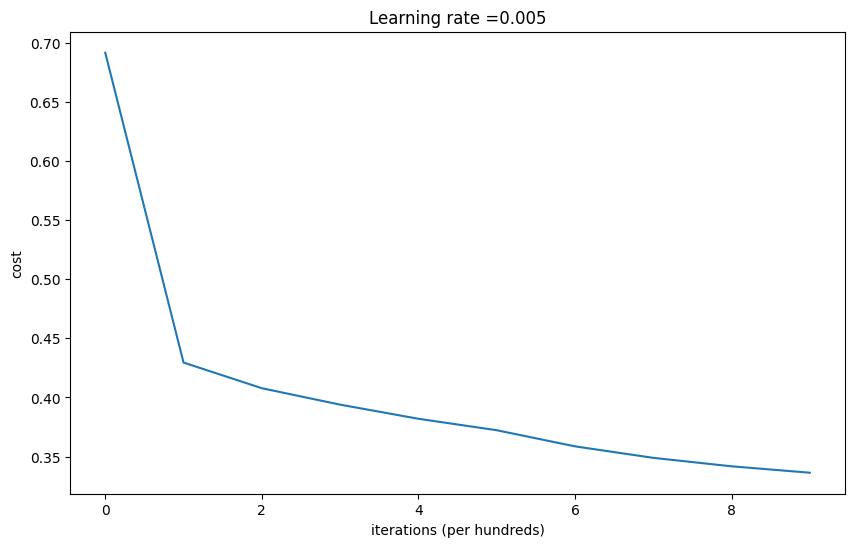

In [ ]:
#training model here

layers_dims = [train_x.shape[0],128, 64, 32, 16, 4, 1] #  6-layer model

def model(train_x, train_y, layers_dims, learning_rate = 0.001, num_iterations = 1500 , print_cost=False,lambd=0.0001):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = [] # keep track of cost

    # Parameters initialization.
    parameters=initialise_params(layers_dims)
    v,s=adam(parameters)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL,caches= forward(train_x, parameters) # Corrected variable name from cache to caches

        #cost calculation
        cost=cost_function(AL, train_y,lambd,parameters)

        # Backward propagation.
        grads=backward(AL, train_y, caches,lambd) # Passing the list of caches

        #params after backprop
        parameters= update_params(grads,parameters,learning_rate,v,s,0.9, 0.999,  epsilon=1e-8,t=i+1)

        # Print the cost every 200 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)

    return parameters, costs

def update_params(grads,params,learning_rate,v,s,beta1,beta2,epsilon,t):
  '''
  updating after gradient descent
  '''
  parameters = copy.deepcopy(params)
  L = len(parameters) // 2 #number of layers in the neural network
  v_corrected = {}
  s_corrected = {}
  # Update rule for each parameter
  for l in range(L):
     v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
     v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]

     v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1**t)
     v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1**t)

     s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)]**2)
     s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)]**2)

     s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2**t)
     s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2**t)


     parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
     parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate *v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

  return parameters

parameters, costs = model(train_x, train_y, layers_dims, num_iterations = 1000, print_cost = True)

#visualising the cost function
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.005))
plt.show()

**PREDICTIONS I/O and CROSS VALIDATION PART**

Training Accuracy: 84.17508417508418 %
Testing Accuracy: 83.01435406698565 %


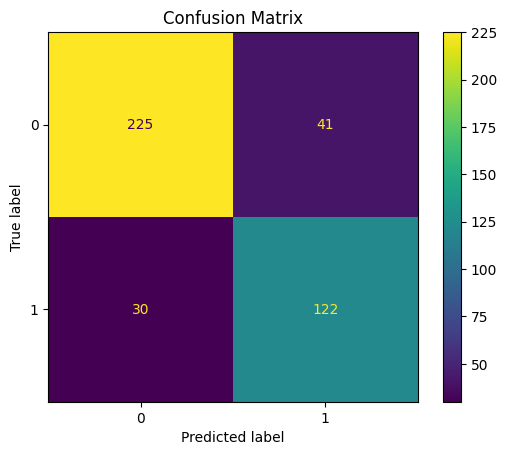

In [ ]:
def predict(parameters, X):
    """
    Predicts the results of a L-layer neural network.

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- data set of examples you would like to predict

    Returns:
    predictions -- numpy array of predictions (containing 0 and 1)
    """

    # Perform forward propagation to get the output probabilities
    AL, caches = forward(X, parameters)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (usually 0.5)
    predictions = (AL > 0.3).astype(int)

    return predictions

# Get predictions on the training set
train_predictions = predict(parameters, train_x)

# Calculate training accuracy
train_accuracy = np.mean(train_predictions == train_y) * 100
print("Training Accuracy:", train_accuracy, "%")

# Get predictions on the test set
test_predictions = predict(parameters, test_x)

# Calculate testing accuracy
test_accuracy = np.mean(test_predictions == test_y) * 100
print("Testing Accuracy:", test_accuracy, "%")

cm = confusion_matrix(test_y.flatten(), test_predictions.flatten())

# Create a ConfusionMatrixDisplay object
# You can optionally add display_labels to make the plot more informative
# For binary classification, display_labels could be ['Did Not Survive', 'Survived']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Add a title to the plot
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Fold 1/5
Fold 1 Accuracy: 80.45%

Fold 2/5
Fold 2 Accuracy: 76.97%

Fold 3/5
Fold 3 Accuracy: 76.97%

Fold 4/5
Fold 4 Accuracy: 79.21%

Fold 5/5
Fold 5 Accuracy: 80.90%

Scores for each fold: [np.float64(80.44692737430168), np.float64(76.96629213483146), np.float64(76.96629213483146), np.float64(79.21348314606742), np.float64(80.89887640449437)]
Average cross-validation accuracy: 78.90%


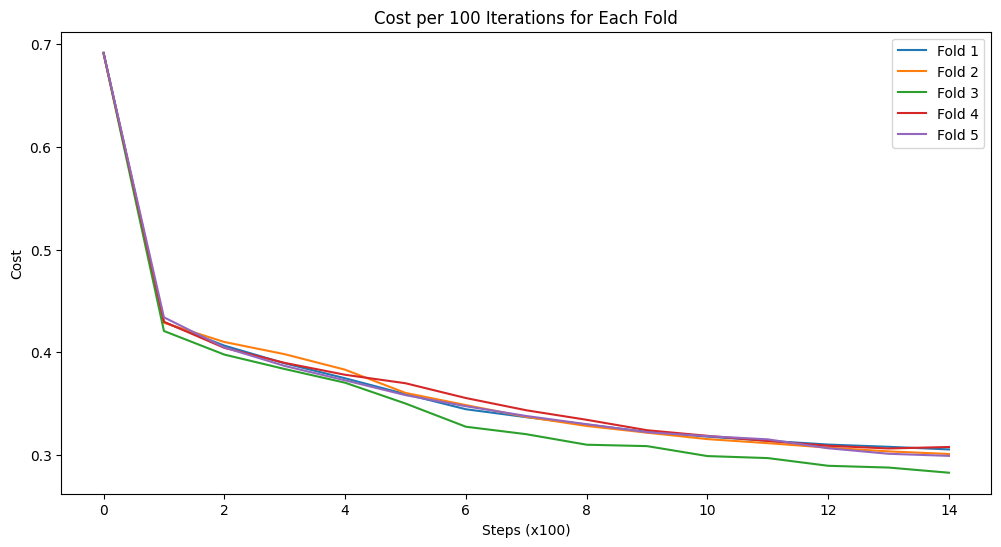

In [ ]:
'''
from the graph for k fold and cost total there is no overfiting or underfitting
good generalizations and learning
'''

# Set up features and target
X = df[['Fare', 'Sex', 'Age', 'Pclass', 'Family']].to_numpy()
y = df['Survived'].to_numpy()

# Define 5-fold Stratified Cross Validation
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Model architecture
layers_dims = [train_x.shape[0],128, 64, 32, 16, 4, 1] #  6-layer model

fold_scores = []
all_costs = []  # For optional visualization

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}/{k}")

    # Split data
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Normalize using training stats
    mean = X_train_fold.mean(axis=0)
    std = X_train_fold.std(axis=0) + 1e-8  # prevent division by 0
    X_train_norm = (X_train_fold - mean) / std
    X_val_norm = (X_val_fold - mean) / std

    # Reshape for model
    X_train_T = X_train_norm.T
    X_val_T = X_val_norm.T
    y_train_T = y_train_fold.reshape(1, -1)
    y_val_T = y_val_fold.reshape(1, -1)

    # Train model (your model initializes parameters fresh each time)
    parameters_fold, costs_fold = model(
        X_train_T,
        y_train_T,
        layers_dims,
        learning_rate=0.001,
        num_iterations=1500,
        print_cost=False,
        lambd=0.0001
    )
    # Save costs for plot (optional)
    all_costs.append(costs_fold)

    # Predict and calculate accuracy
    val_predictions = predict(parameters_fold, X_val_T)
    fold_accuracy = np.mean(val_predictions == y_val_T) * 100
    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.2f}%")
    fold_scores.append(fold_accuracy)

# Final results
print(f"\nScores for each fold: {fold_scores}")
print(f"Average cross-validation accuracy: {np.mean(fold_scores):.2f}%")

# Optional: Visualize loss for all folds
plt.figure(figsize=(12, 6))
for i, costs in enumerate(all_costs):
    plt.plot(costs, label=f'Fold {i + 1}')
plt.title('Cost per 100 Iterations for Each Fold')
plt.xlabel('Steps (x100)')
plt.ylabel('Cost')
plt.legend()
plt.show()


In [ ]:
'''
user io
'''
# Get user input
user_fare = float(input("Enter Fare: "))
user_sex = int(input("Enter Sex (0 for male, 1 for female): "))
user_age = float(input("Enter Age: "))
user_pclass = int(input("Enter Pclass (1, 2, or 3): "))
user_family = int(input("Enter Family size (Sibling_or_spouse_onboard + parent_or_child_onboard): "))

# Create a NumPy array from user input
user_input = np.array([[user_fare, user_sex, user_age, user_pclass, user_family]])

# Normalize the user input using the mean and std from the training data
# You need to use the mean and std calculated *before* splitting the data
# For this, we'll recalculate mean and std of the original X
original_X_mean = np.mean(X, axis=0)
original_X_std = np.std(X, axis=0)

user_input_normalized = (user_input - original_X_mean) / original_X_std

# Transpose the input to match the model's expected input shape (features, examples)
user_input_normalized = user_input_normalized.T

# Make a prediction
user_prediction = predict(parameters, user_input_normalized)

# Print the prediction
if user_prediction[0, 0] == 1:
    print("Based on the input, the model predicts survival.")
else:
    print("Based on the input, the model predicts no survival.")

Enter Fare: 2
Enter Sex (0 for male, 1 for female): 2
Enter Age: 2
Enter Pclass (1, 2, or 3): 2
Enter Family size (Sibling_or_spouse_onboard + parent_or_child_onboard): 2
Based on the input, the model predicts survival.


**SAVING DATA FOR API USAGE**

In [ ]:
import pickle
import numpy as np

# Save model parameters
with open("parameters.pkl", "wb") as f:
    pickle.dump(parameters, f)

# Save normalization data
np.save("X_mean.npy", original_X_mean)
np.save("X_std.npy", original_X_std)


from google.colab import files

files.download('parameters.pkl')
files.download('X_mean.npy')
files.download('X_std.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>